<a href="https://colab.research.google.com/github/navya480/Exploratory-Data-Analysis/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data AnalyStudy - Indian Crime Data

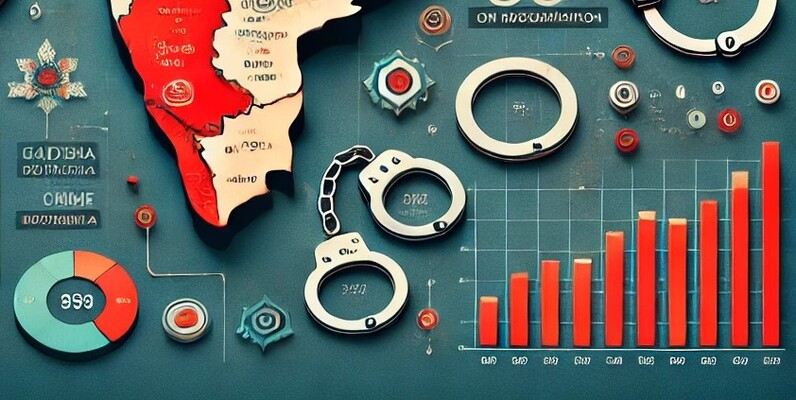


Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

The following topics are covered in this prject:

1.Downloading a dataset from an online source

2.Data preparation and cleaning with Pandas

3.Open-ended exploratory analysis and visualization

4.Asking and answering interesting questions

5.Summarizing inferences and drawing conclusions





Before we begin, let's install the required libraries

# Introductio

In this tutorial, we'll analyze the Indian Crime 2023 dataset.The dataset contains Detailed crime data from various cities in India for the year 2023.

You can find the official analysis of the data here: /content/crime_dataset_india.csv

There are several options for getting a dataset into Jupyter:

1.Download the CSV manually and upload it via Jupyter's GUI

2.Use the opendatasets library to download datasets from Kaggle datasets and Google Drive URLs

In this case, the dataset is hosted on Google Drive at this location:
https://www.kaggle.com/datasets/sudhanvahg/indian-crimes-dataset

We'll use the opendatasets helper library to download files from the above URL.



In [ ]:
!pip install numpy

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
ur='https://www.kaggle.com/datasets/sudhanvahg/indian-crimes-dataset'

In [ ]:
ur

In [ ]:
od.download(ur)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
crime=pd.read_csv('/content/indian-crimes-dataset/crime_dataset_india.csv')

In [ ]:
crime

\Let's verify that the dataset was downloaded into the directory `Indian Crime Data 2023` and retrieve the list of files in the dataset.

**NOTE**: If the above Google Drive link doesn't work you can also use this alternate link from Kaggle:

 https://www.kaggle.com/datasets/sudhanvahg/indian-crimes-dataset (uncomment the code in the following cell to download)

In [ ]:
column=crime.columns

In [ ]:
column

The dataset contains over40160 responses to 14 questions(although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame.

It appears that shortcodes for questions have been used as column names.

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText. We can load it as Pandas Series with Column as the index and the QuestionText as the value.

Since crime contains just one column, let's retrieve the column as a Pandas series.



We can now use crime to retrieve the full question text for any column in crime.

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

# Data Preprocessing & Cleaning with Pandas
While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community

- Distribution of programming skills, experience, and preferences

- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

Let's extract a copy of the data from these columns into a new data frame crime. We can continue to modify further without affecting the original data frame.

**Exercise:** Read and understand the question associated with each column in `crime` using `crime`.

Let's view some basic information about the data frame.

In [ ]:
crime.info()

In [ ]:
crime.isna().sum()/len(crime)*100

In [ ]:
crime.City

In [ ]:
len(column)

In [ ]:
crime['Victim Age']


In [ ]:
crime['Crime Code'].unique()

In [ ]:
crime['Date Reported'].unique()

In [ ]:
crime['Weapon Used'].unique()

In [ ]:
crime['Weapon Used'] = crime['Weapon Used'].fillna('Unknown')

In [ ]:
crime['Date Case Closed'].unique()

In [ ]:
crime['Date Case Closed'] = crime['Date Case Closed'].fillna(pd.to_datetime('2050-01-01'))

In [ ]:
crime.info()

In [ ]:
crime.describe()

In [ ]:
sns.boxplot(x=crime['Report Number'])

In [ ]:
crime.isna().sum()/len(crime) * 100

##Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e.,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City, Crime Code, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Country

Let's look at the number of crimes from which there are reported in the survey and plot the most occured crimes with the highest number of reported.

In [ ]:
print(crime.City.unique())

In [ ]:
crime.City.nunique()

In [ ]:
crime.City.value_counts().head(10)

We can identify the city with the highest number of respondents using the `value_counts` method.

In [ ]:
crime.groupby('City').City.count().sort_values(ascending=True).head(10)

In [ ]:
top_city = crime.City.value_counts().head(5)
top_city

We can visualize this information using a bar chart.

In [ ]:
sns.set_style('darkgrid')

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=75)
plt.title('Where more crimes ? ')
sns.barplot(x= top_city.index, y = top_city);

In [ ]:
import plotly.express as px

In [ ]:
fig =px.bar(x= top_city.index, y = top_city,color=top_city,color_discrete_map ={
    'Delhi' : 'Red',
    'Mumbai' : 'Blue',
    'Bangalore' :'Green',
    'Hyderabad' :'Gold',
    'Kolkata': 'Yellow'})

In [ ]:
fig.show()

It appears that a disproportionately high number of crimes  are reported in Delhi and Mumbai, probably because they are more populated areas, and these citys have the highest populations and crowded areas. We can already see that the survey may not be representative of the  all countrys programming community - especially from non crowded and low crime rated areas. Programmers from  non crowded and low crime rated areas are almost certainly under represented.

**Exercises**:

1. Try finding the percentage of reported crime from crowded city vs. non-crowded city.

2. Instead of displaying overall count of responses for each crime on the Y axis of the above chart, display the percentage of responses instead.

3. Instead of displaying the overall count of response for each city, display "reponses per million people". Use an external dataset to get the crime rate of each city.



### Age

The distribution of ' Victim Age'	 is another crucial factor to look at. We can use a histogram and box plot to visualize its distribution.

In [ ]:
crime['Victim Age']

In [ ]:
sns.histplot(x=crime['Victim Age'])